In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#loading the given csv data
data = pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
#checking for null values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
#converting to a dataframe
df = pd.DataFrame(data)

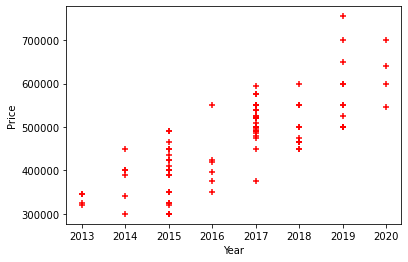

In [6]:
#checking the variation
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(df.Year,df.Price,color = 'red', marker='+');

# Linear Regression

In [7]:
#defining feature matrix(X) and response vector(y)
X = data['Year'].array.reshape(-1, 1)
Y = data['Price']

In [8]:
#splitting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=.1)

In [9]:
from sklearn.linear_model import LinearRegression
#create linear regression object
lr = LinearRegression()
#train the model using the training sets
model = lr.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [10]:
Y_test

40    525000
65    495000
4     465000
47    450000
42    550000
69    300000
26    550000
11    500000
10    500000
44    550000
73    320000
55    550000
Name: Price, dtype: int64

In [11]:
predictions

array([593702.54160273, 502978.41579133, 548340.47869703, 548340.47869703,
       548340.47869703, 412254.28997993, 502978.41579133, 548340.47869703,
       593702.54160273, 593702.54160273, 321530.16416854, 502978.41579133])

In [12]:
#calculating the mean squared error and coefficient of determination
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error is:', mean_squared_error(Y_test,predictions))
print('R squared value is:' ,r2_score(Y_test,predictions))

Mean squared error is: 4287936633.521391
R squared value is: 0.37075450283857203


# Lasso Regression

In [13]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [14]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train,Y_train)
Y_pred1 = lasso.predict(X_test)

In [15]:
# Calculate Mean Squared Error
print("Mean squared error on test set", mean_squared_error(Y_pred1,Y_test))
print('R squared value is:' ,r2_score(Y_pred1,Y_test))

Mean squared error on test set 4287897329.759714
R squared value is: 0.2786675342258711
